# Objectives and Constraints: How They Shape Recommendations

This notebook demonstrates a critical principle of prescriptive analytics: **models recommend based on what you tell them**. 

The same data can lead to different recommendations depending on:
- **Objectives**: What are you trying to achieve?
- **Constraints**: What limits must you respect?

Understanding this helps you use prescriptive analytics effectively and explains why recommendations change when objectives or constraints change.


## Key Concepts

**Objectives** define what you're trying to achieve:
- Maximize profit
- Minimize cost
- Maximize customer satisfaction
- Balance multiple goals

**Constraints** define what you cannot do:
- Budget limits
- Capacity limits
- Regulatory requirements
- Policy restrictions

**Critical insight**: Change the objectives or constraints, and the recommendation changes. The model doesn't know what you want unless you tell it explicitly.


## Scenario: Retail Store Staffing Decision

You manage a retail store and must decide how many staff hours to schedule for the upcoming week. You have historical data showing how different staffing levels performed in the past.

**Decision variable**: Staff hours to schedule (80, 90, 100, 110, or 120 hours)

**Outcomes**: Revenue and profit depend on staffing level


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Create Historical Data

Let's create data showing how different staffing levels performed historically:


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Create staffing options
staffing_options = pd.DataFrame({
    'staff_hours': [80, 90, 100, 110, 120],
    'description': ['Low staffing', 'Moderate-low', 'Moderate', 'Moderate-high', 'High staffing']
})


Now calculate the outcomes for each staffing level:


In [3]:
# Calculate costs
staffing_options['staff_cost'] = staffing_options['staff_hours'] * 25  # $25 per hour


In [4]:
# Calculate revenue (more staff = more sales capability)
staffing_options['revenue'] = (
    2000 +  # Base revenue
    staffing_options['staff_hours'] * 30 +  # Each hour generates $30 in sales
    -0.2 * (staffing_options['staff_hours'] - 100)**2  # Diminishing returns (optimal around 100 hours)
)


In [5]:
# Calculate profit
staffing_options['profit'] = staffing_options['revenue'] - staffing_options['staff_cost']


Let's see the data:


In [6]:
display_df = staffing_options[['staff_hours', 'description', 'staff_cost', 'revenue', 'profit']].copy()
display_df.columns = ['Staff Hours', 'Description', 'Cost ($)', 'Revenue ($)', 'Profit ($)']
display_df


,Staff Hours,Description,Cost ($),Revenue ($),Profit ($)
0,80,Low staffing,2000,4320.0,2320.0
1,90,Moderate-low,2250,4680.0,2430.0
2,100,Moderate,2500,5000.0,2500.0
3,110,Moderate-high,2750,5280.0,2530.0
4,120,High staffing,3000,5520.0,2520.0


## Scenario 1: Objective = Maximize Revenue

**Question**: What staffing level should we choose if our only goal is to maximize revenue?

Let's find the option with the highest revenue:


In [7]:
# Find option that maximizes revenue
best_for_revenue = staffing_options.loc[staffing_options['revenue'].idxmax()]

pd.DataFrame({
    'Objective': ['Maximize Revenue'],
    'Recommended Staff Hours': [f"{best_for_revenue['staff_hours']:.0f}"],
    'Revenue': [f"${best_for_revenue['revenue']:,.0f}"],
    'Cost': [f"${best_for_revenue['staff_cost']:,.0f}"],
    'Profit': [f"${best_for_revenue['profit']:,.0f}"]
})


,Objective,Recommended Staff Hours,Revenue,Cost,Profit
0,Maximize Revenue,120,"$5,520","$3,000","$2,520"


**Observation**: Looking at the table above, when the objective is to maximize revenue, the model recommends **120 staff hours**, which generates **$5,520 in revenue** (the highest). However, this comes at a cost of **$3,000** (staff cost) and results in a profit of **$2,520**. The model recommends this option regardless of cost or profit because we told it to maximize revenue only.

## Scenario 2: Objective = Maximize Profit

**Question**: What if we change the objective to maximize profit instead of revenue?

Let's find the option with the highest profit:


In [8]:
# Find option that maximizes profit
best_for_profit = staffing_options.loc[staffing_options['profit'].idxmax()]

pd.DataFrame({
    'Objective': ['Maximize Profit'],
    'Recommended Staff Hours': [f"{best_for_profit['staff_hours']:.0f}"],
    'Revenue': [f"${best_for_profit['revenue']:,.0f}"],
    'Cost': [f"${best_for_profit['staff_cost']:,.0f}"],
    'Profit': [f"${best_for_profit['profit']:,.0f}"]
})


,Objective,Recommended Staff Hours,Revenue,Cost,Profit
0,Maximize Profit,110,"$5,280","$2,750","$2,530"


**Observation**: Looking at the table above, when the objective changes to maximize profit, the recommendation changes! The model now recommends **110 staff hours** instead of 120 hours. This generates **$5,280 in revenue** (less than the $5,520 from 120 hours) but results in **$2,530 in profit** (higher than the $2,520 from 120 hours) because the cost is lower ($2,750 vs $3,000). The model is now optimizing for a different goal.

**Key insight**: The same data leads to different recommendations when you change the objective. With 120 hours: revenue $5,520, profit $2,520. With 110 hours: revenue $5,280, profit $2,530. The model doesn't know what you want unless you tell it explicitly - maximize revenue or maximize profit?


## Scenario 3: Add a Constraint

**Question**: What if we add a budget constraint? How does that change the recommendation?

Let's say we have a budget limit: total staff cost cannot exceed $2,500 per week.


In [9]:
# Constraint: Budget limit
budget_limit = 2500

# Filter to only feasible options (within budget)
feasible_options = staffing_options[staffing_options['staff_cost'] <= budget_limit].copy()

pd.DataFrame({
    'Constraint': ['Budget limit: $2,500'],
    'Feasible Options': [f"{len(feasible_options)} options"],
    'Options': [', '.join([f"{h:.0f}h" for h in feasible_options['staff_hours']])]
})


,Constraint,Feasible Options,Options
0,"Budget limit: $2,500",3 options,"80h, 90h, 100h"


Now let's find the best option **within the budget constraint**:


In [10]:
# Find best option within budget (maximize profit)
best_with_constraint = feasible_options.loc[feasible_options['profit'].idxmax()]

pd.DataFrame({
    'Scenario': ['With Budget Constraint ($2,500)'],
    'Objective': ['Maximize Profit'],
    'Recommended Staff Hours': [f"{best_with_constraint['staff_hours']:.0f}"],
    'Cost': [f"${best_with_constraint['staff_cost']:,.0f} (within budget)"],
    'Revenue': [f"${best_with_constraint['revenue']:,.0f}"],
    'Profit': [f"${best_with_constraint['profit']:,.0f}"]
})


,Scenario,Objective,Recommended Staff Hours,Cost,Revenue,Profit
0,"With Budget Constraint ($2,500)",Maximize Profit,100,"$2,500 (within budget)","$5,000","$2,500"


**Observation**: Looking at the table above, the budget constraint of $2,500 eliminated options with costs above that limit (110 hours costs $2,750 and 120 hours costs $3,000 are no longer feasible). The recommendation is now **100 staff hours** with:
- Cost: **$2,500** (exactly at the budget limit)
- Revenue: **$5,000**
- Profit: **$2,500**

This is different from the unconstrained best option (110 hours with profit $2,530), but it's the best option **among those that are feasible** within the budget constraint. The constraint changed the recommendation from 110 hours to 100 hours.

## Scenario 4: Change the Constraint

**Question**: What if we change the budget constraint? How does that affect the recommendation?

Let's try a different budget limit: $2,000 per week.


In [11]:
# New constraint: Tighter budget
new_budget_limit = 2000

# Filter to feasible options with new constraint
feasible_options_new = staffing_options[staffing_options['staff_cost'] <= new_budget_limit].copy()

# Find best option with new constraint
best_with_new_constraint = feasible_options_new.loc[feasible_options_new['profit'].idxmax()]

pd.DataFrame({
    'Scenario': ['With Tighter Budget Constraint ($2,000)'],
    'Objective': ['Maximize Profit'],
    'Recommended Staff Hours': [f"{best_with_new_constraint['staff_hours']:.0f}"],
    'Cost': [f"${best_with_new_constraint['staff_cost']:,.0f} (within budget)"],
    'Revenue': [f"${best_with_new_constraint['revenue']:,.0f}"],
    'Profit': [f"${best_with_new_constraint['profit']:,.0f}"]
})


,Scenario,Objective,Recommended Staff Hours,Cost,Revenue,Profit
0,"With Tighter Budget Constraint ($2,000)",Maximize Profit,80,"$2,000 (within budget)","$4,320","$2,320"


**Observation**: Looking at the table above, changing the constraint to $2,000 changed the recommendation again! With this tighter budget, only options with costs $2,000 or less are feasible (80 hours at $2,000 and 90 hours at $2,250 are now excluded). The recommendation is now **80 staff hours** with:
- Cost: **$2,000** (exactly at the budget limit)
- Revenue: **$4,320**
- Profit: **$2,320**

With the $2,500 budget, the recommendation was 100 hours (profit $2,500). With the $2,000 budget, the recommendation is 80 hours (profit $2,320). The tighter budget eliminated more options and changed the best feasible option. This demonstrates how constraints directly affect recommendations.

## Comparing All Scenarios

Let's see how the recommendations change across different scenarios:


In [12]:
# Create comparison table of all scenarios
comparison = pd.DataFrame({
    'Scenario': [
        'Maximize Revenue (no constraints)',
        'Maximize Profit (no constraints)',
        'Maximize Profit (budget ≤ $2,500)',
        'Maximize Profit (budget ≤ $2,000)'
    ],
    'Recommended Hours': [
        best_for_revenue['staff_hours'],
        best_for_profit['staff_hours'],
        best_with_constraint['staff_hours'],
        best_with_new_constraint['staff_hours']
    ],
    'Revenue': [
        best_for_revenue['revenue'],
        best_for_profit['revenue'],
        best_with_constraint['revenue'],
        best_with_new_constraint['revenue']
    ],
    'Profit': [
        best_for_revenue['profit'],
        best_for_profit['profit'],
        best_with_constraint['profit'],
        best_with_new_constraint['profit']
    ]
})

comparison['Recommended Hours'] = comparison['Recommended Hours'].astype(int)
comparison['Revenue'] = comparison['Revenue'].apply(lambda x: f"${x:,.0f}")
comparison['Profit'] = comparison['Profit'].apply(lambda x: f"${x:,.0f}")
comparison


,Scenario,Recommended Hours,Revenue,Profit
0,Maximize Revenue (no constraints),120,"$5,520","$2,520"
1,Maximize Profit (no constraints),110,"$5,280","$2,530"
2,"Maximize Profit (budget ≤ $2,500)",100,"$5,000","$2,500"
3,"Maximize Profit (budget ≤ $2,000)",80,"$4,320","$2,320"


**Key observation**: Looking at the comparison table above, each scenario produces a different recommendation! The same data, but different objectives and constraints lead to different answers:

- **Maximize Revenue**: Recommends **120 hours** (revenue $5,520, profit $2,520)
- **Maximize Profit (no constraints)**: Recommends **110 hours** (revenue $5,280, profit $2,530)
- **Maximize Profit (budget ≤ $2,500)**: Recommends **100 hours** (revenue $5,000, profit $2,500)
- **Maximize Profit (budget ≤ $2,000)**: Recommends **80 hours** (revenue $4,320, profit $2,320)

Notice how the recommendation changes from 120 → 110 → 100 → 80 hours as we add constraints and change objectives. This demonstrates that models recommend based on what you tell them.

## Visualizing How Objectives and Constraints Change Recommendations


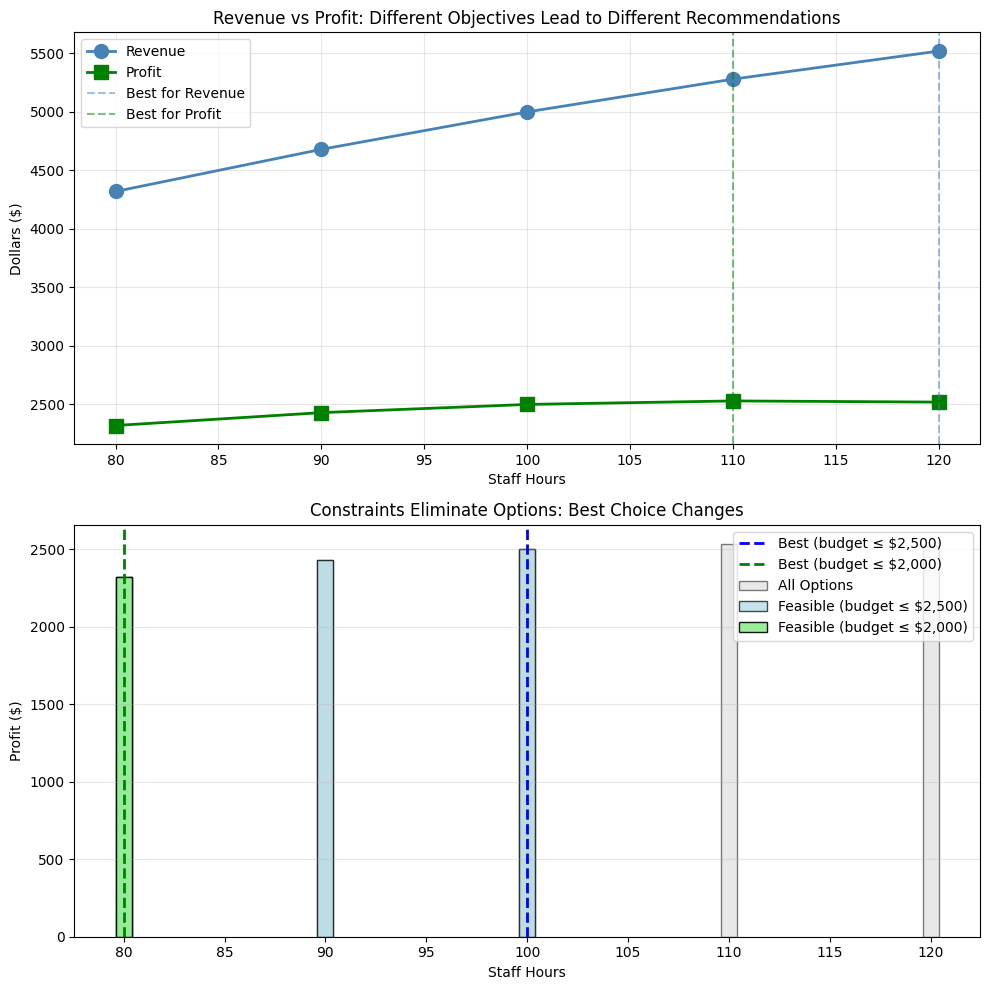

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Top plot: Revenue and Profit by staffing level
axes[0].plot(staffing_options['staff_hours'], staffing_options['revenue'], 
            marker='o', linewidth=2, markersize=10, label='Revenue', color='steelblue')
axes[0].plot(staffing_options['staff_hours'], staffing_options['profit'], 
            marker='s', linewidth=2, markersize=10, label='Profit', color='green')

# Mark the recommendations
axes[0].axvline(x=best_for_revenue['staff_hours'], color='steelblue', 
                linestyle='--', alpha=0.5, label='Best for Revenue')
axes[0].axvline(x=best_for_profit['staff_hours'], color='green', 
                linestyle='--', alpha=0.5, label='Best for Profit')

axes[0].set_xlabel('Staff Hours')
axes[0].set_ylabel('Dollars ($)')
axes[0].set_title('Revenue vs Profit: Different Objectives Lead to Different Recommendations')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bottom plot: Feasible options with constraints
axes[1].bar(staffing_options['staff_hours'], staffing_options['profit'], 
           color='lightgray', edgecolor='black', alpha=0.5, label='All Options')

# Highlight feasible options with different budgets
feasible_2500 = staffing_options[staffing_options['staff_cost'] <= 2500]
feasible_2000 = staffing_options[staffing_options['staff_cost'] <= 2000]

axes[1].bar(feasible_2500['staff_hours'], feasible_2500['profit'], 
           color='lightblue', edgecolor='black', alpha=0.7, label='Feasible (budget ≤ $2,500)')
axes[1].bar(feasible_2000['staff_hours'], feasible_2000['profit'], 
           color='lightgreen', edgecolor='black', alpha=0.9, label='Feasible (budget ≤ $2,000)')

# Mark best options
axes[1].axvline(x=best_with_constraint['staff_hours'], color='blue', 
               linestyle='--', linewidth=2, label='Best (budget ≤ $2,500)')
axes[1].axvline(x=best_with_new_constraint['staff_hours'], color='green', 
               linestyle='--', linewidth=2, label='Best (budget ≤ $2,000)')

axes[1].set_xlabel('Staff Hours')
axes[1].set_ylabel('Profit ($)')
axes[1].set_title('Constraints Eliminate Options: Best Choice Changes')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


**What the visualizations show**:

1. **Top plot**: Revenue and profit have different peaks. Looking at the chart:
   - **Revenue peaks at 120 hours** ($5,520) - this is what maximizing revenue recommends
   - **Profit peaks at 110 hours** ($2,530) - this is what maximizing profit recommends
   - The difference: 120 hours gives $240 more revenue ($5,520 vs $5,280) but $10 less profit ($2,520 vs $2,530) because the extra 10 hours cost $250 but only generate $240 in revenue
   - Maximizing revenue leads to one recommendation (120 hours); maximizing profit leads to a different recommendation (110 hours)

2. **Bottom plot**: Constraints eliminate options (gray bars are infeasible). Looking at the chart:
   - With **$2,500 budget constraint**: Options at 110 hours ($2,750) and 120 hours ($3,000) are grayed out (infeasible). The best feasible option is 100 hours (profit $2,500)
   - With **$2,000 budget constraint**: Options at 90 hours ($2,250), 100 hours ($2,500), 110 hours ($2,750), and 120 hours ($3,000) are grayed out. The best feasible option is 80 hours (profit $2,320)
   - The best option among feasible ones changes as constraints change, demonstrating how constraints directly affect recommendations

## Key Takeaways

1. **Objectives determine what you optimize for**: Maximize revenue vs. maximize profit = different recommendations

2. **Constraints determine what's feasible**: Budget limits eliminate some options, changing which option is best

3. **Models recommend based on what you tell them**: If objectives or constraints are wrong, recommendations will be wrong

4. **You must be explicit**: The model doesn't know what you want unless you clearly state your objectives and constraints

5. **Changing objectives or constraints changes recommendations**: This is expected and correct behavior


## Why This Matters

Many people think prescriptive analytics gives "the answer." But there is no single answer - there are different answers for different objectives and constraints.

**Example**: 
- If your objective is growth, you might accept lower profit to maximize revenue
- If your objective is profitability, you might accept lower revenue to maximize profit
- Both are valid - the model recommends based on what you tell it you want

**The responsibility**: You must clearly define objectives and constraints. If you're vague or wrong about what you want, the model will optimize for the wrong thing, and you'll get recommendations that don't serve your actual goals.


## Summary

This notebook demonstrated:

1. **Objectives shape recommendations**: Maximizing revenue vs. maximizing profit leads to different recommendations from the same data

2. **Constraints limit options**: Budget constraints eliminate infeasible options, changing which option is best

3. **Models are tools, not oracles**: They recommend based on what you tell them - your objectives and constraints

4. **Clarity is essential**: You must be explicit about what you want and what limits you face

5. **Recommendations change when inputs change**: This is correct behavior, not a flaw

Understanding this helps you use prescriptive analytics effectively and explains why recommendations might change when business priorities or constraints change.
